# Import libraries

In [1]:
# Import pandas, numpy, seabon, sklearn, pyplot
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
import swifter

from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.cluster import KMeans

pd.set_option('max.rows', None)
pd.set_option('max.columns', None)

%matplotlib inline

In [2]:
from config_and_dependencies.config import * 

# Import Data

In [11]:
mydata = pd.read_csv(data_input_path)

%store mydata

Stored 'mydata' (DataFrame)


In [4]:
mydata.head()

,REF,DENOMINATION,OBVERSE,REVERSE,MINT,EMPEROR,NAMED,ARSENIC,GOLD,COPPER,IRON,NICKEL,LEAD,ANTIMONY,TIN,ZINC,MANGANESE,CHROMIUM,COBALT,BISMUTH,SILVER,BULLION,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,BCC10,denarius,CAESAR VESPASIANVS AVG,AN[NONA AVG],Rome,Vespasian,Vespasian,0.003,0.378,20.60,0.014,0.001,0.59,0.001,0.0023,0.0106,0.00007,0.00005,0.0001,0.009,78.40,79.37,NaN,NaN,NaN,NaN,NaN
1,BCC11,denarius,T CAESAR IMP VESPASIANVS,"COS VI , Mars.",Rome,Vespasian,Titus,0.003,0.377,22.99,0.008,0.002,0.63,0.008,0.0270,0.2527,0.00008,0.00005,0.0001,0.021,75.68,76.70,NaN,NaN,NaN,NaN,NaN
2,BCC12,denarius,T CAESAR IMP VESPAS[IANVS],"TR POT VIII [COS VII] , trophy.",Rome,Vespasian,Titus,0.002,0.631,19.30,0.006,0.001,0.46,0.005,0.0010,0.0001,0.00014,0.00004,0.0003,0.000,79.59,80.69,NaN,NaN,NaN,NaN,NaN
3,BCC13,denarius,T CAESAR IMP VESPASIANVS,IOVIS CVSTOS,Rome,Vespasian,Titus,0.011,0.599,17.08,0.004,0.003,0.29,0.015,0.0009,0.0003,0.00031,0.00004,0.0004,0.000,84.31,85.20,NaN,NaN,NaN,NaN,NaN
4,BCC137,denarius,IMP NERO CAESAR AVGVSTVS,IVPPITER CVSTOS,Rome,Nero,Nero,0.003,0.395,9.60,0.004,0.001,1.09,0.004,0.0013,0.0010,0.00014,0.00006,0.0001,0.029,88.87,90.38,NaN,NaN,NaN,NaN,NaN


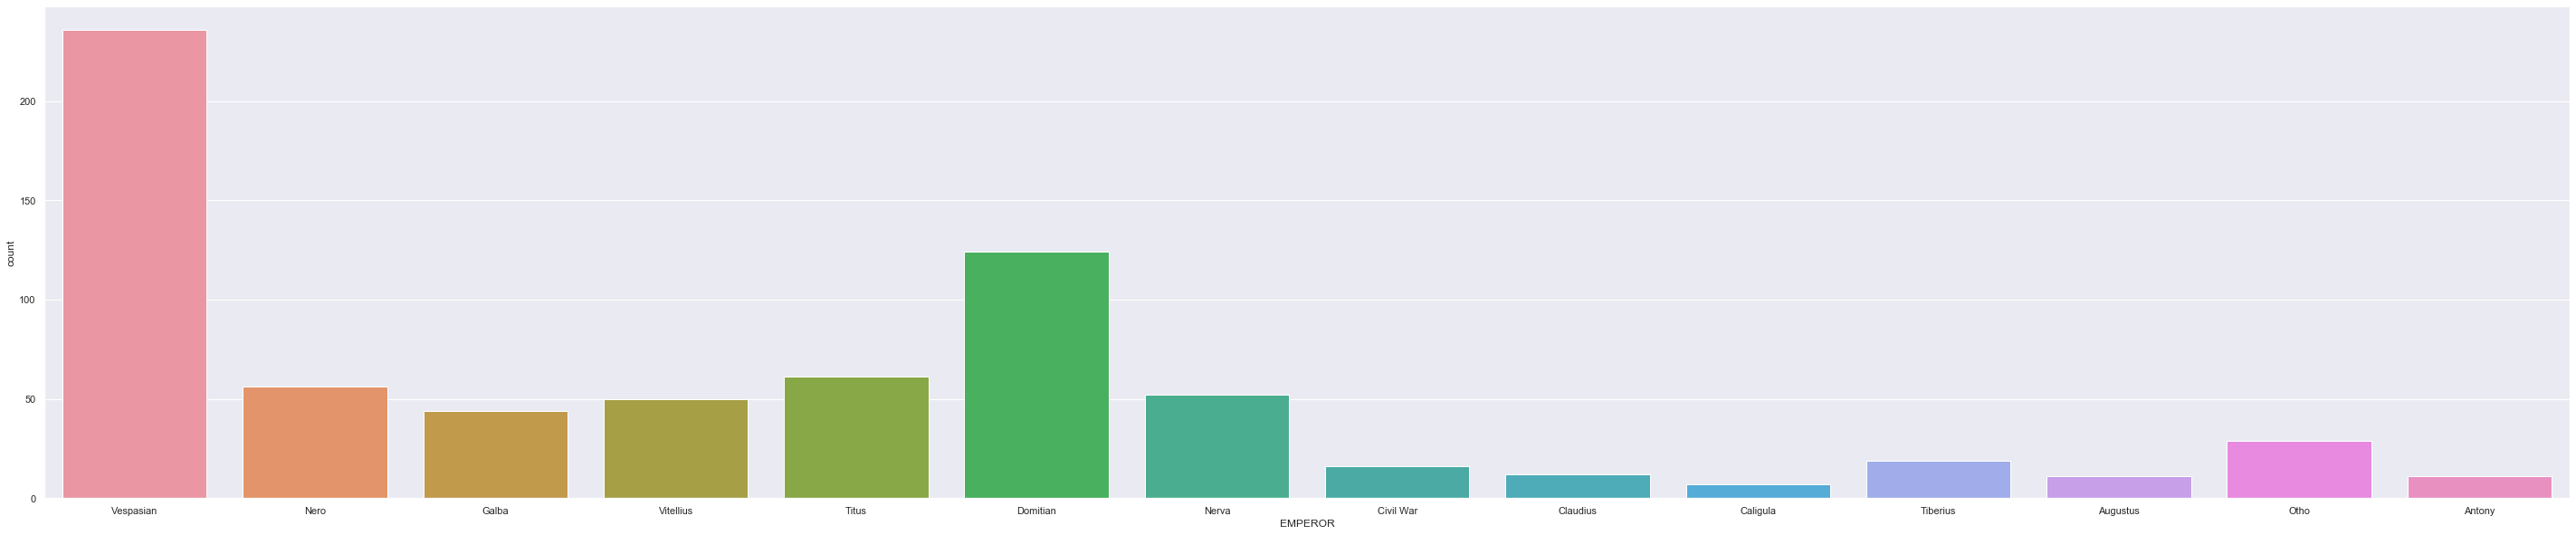

In [5]:
sns.set(rc={'figure.figsize':(50,10)})
sns.countplot(mydata['EMPEROR'])

# Descriptive Statistics

In [7]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 728 entries, 0 to 727
Data columns (total 27 columns):
REF             728 non-null object
DENOMINATION    728 non-null object
OBVERSE         728 non-null object
REVERSE         728 non-null object
MINT            728 non-null object
EMPEROR         728 non-null object
NAMED           728 non-null object
ARSENIC         728 non-null float64
GOLD            728 non-null float64
COPPER          728 non-null float64
IRON            728 non-null float64
NICKEL          728 non-null float64
LEAD            728 non-null float64
ANTIMONY        728 non-null float64
TIN             728 non-null float64
ZINC            728 non-null float64
MANGANESE       728 non-null float64
CHROMIUM        728 non-null float64
COBALT          728 non-null float64
BISMUTH         728 non-null float64
SILVER          728 non-null float64
BULLION         728 non-null float64
Unnamed: 22     114 non-null float64
Unnamed: 23     114 non-null float64
Unnamed: 24   

In [8]:
mydata.describe()

,ARSENIC,GOLD,COPPER,IRON,NICKEL,LEAD,ANTIMONY,TIN,ZINC,MANGANESE,CHROMIUM,COBALT,BISMUTH,SILVER,BULLION,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
count,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,114.000000,114.000000,114.000000,114.000000,114.000000
mean,0.010192,0.485988,13.964437,0.017015,0.002374,0.517981,0.031282,0.101236,0.015680,0.000258,0.001256,0.012907,0.028573,84.893736,85.888228,18.430526,15.654912,38.565175,0.849211,2.092018
std,0.008824,0.219025,10.665988,0.106985,0.015178,0.275122,0.610080,2.415292,0.201022,0.001060,0.018052,0.065384,0.040495,10.936063,10.956794,0.123524,0.021830,0.142253,0.005346,0.008640
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000600,0.000000,0.000000,0.000000,0.000000,0.000000,-0.030000,0.120000,17.830000,15.570000,38.140000,0.840000,2.070000
25%,0.005000,0.362000,6.467500,0.005000,0.000000,0.340000,0.003000,0.002300,0.000500,0.000050,0.000098,0.000200,0.005000,77.830000,78.750000,18.390000,15.650000,38.500000,0.850000,2.090000
50%,0.008000,0.486000,13.845000,0.009000,0.001000,0.460000,0.006000,0.003800,0.000750,0.000100,0.000180,0.000300,0.017000,85.255000,86.125000,18.430000,15.660000,38.560000,0.850000,2.090000
75%,0.013000,0.611000,21.165000,0.014000,0.002000,0.620000,0.012000,0.008800,0.003000,0.000170,0.000290,0.000400,0.038000,92.435000,93.485000,18.460000,15.660000,38.610000,0.850000,2.090000
max,0.119000,1.810000,99.700000,2.831000,0.401000,1.770000,16.468000,65.176600,4.446300,0.025030,0.466070,0.891200,0.315000,100.000000,100.340000,18.770000,15.710000,38.930000,0.870000,2.140000


In [9]:
mydata.nunique()

REF             728
DENOMINATION      1
OBVERSE         299
REVERSE         398
MINT             14
EMPEROR          14
NAMED            17
ARSENIC          40
GOLD            437
COPPER          606
IRON             58
NICKEL           20
LEAD            126
ANTIMONY         41
TIN             228
ZINC            150
MANGANESE        93
CHROMIUM        132
COBALT          101
BISMUTH         120
SILVER          619
BULLION         602
Unnamed: 22      42
Unnamed: 23      13
Unnamed: 24      46
Unnamed: 25       4
Unnamed: 26       6
dtype: int64

In [10]:
mydata[features_start:features_end].groupby(mydata['MINT']).describe()

ARSENIC                                                       \
                count      mean       std    min      25%     50%      75%   
MINT                                                                         
?                 2.0  0.053500  0.051619  0.017  0.03525  0.0535  0.07175   
Antioch           7.0  0.012714  0.006525  0.003  0.00950  0.0130  0.01500   
Antony           11.0  0.022727  0.007404  0.007  0.01950  0.0260  0.02800   
Carthage          1.0  0.005000       NaN  0.005  0.00500  0.0050  0.00500   
Ephesus          16.0  0.017313  0.008927  0.004  0.01175  0.0155  0.02150   
Gaul             21.0  0.019905  0.029804  0.003  0.00400  0.0070  0.01300   
Gaul or Spain     3.0  0.006667  0.005508  0.003  0.00350  0.0040  0.00850   
Lyon             56.0  0.008339  0.006209  0.002  0.00400  0.0070  0.01000   
O mint            4.0  0.013500  0.007767  0.008  0.00950  0.0105  0.01450   
Rome            570.0  0.009630  0.006228  0.001  0.00500  0.0080  0.01300   
Spanish          18.0  0.007111  0.003008  0.003  0.00500  0.0070  0.00900   
Tarraco           1.0  0.005000       NaN  0.005  0.00500  0.0050  0.00500   
UG3               4.0  0.010000  0.006218  0.003  0.00600  0.0100  0.01400   
UG5               1.0  0.006000       NaN  0.006  0.00600  0.0060  0.00600   

                       GOLD                                              \
                 max  count      mean       std    min      25%     50%   
MINT                                                                      
?              0.090    2.0  0.009000  0.008485  0.003  0.00600  0.0090   
Antioch        0.024    7.0  0.493571  0.142582  0.346  0.37800  0.4460   
Antony         0.031   11.0  0.373182  0.033487  0.288  0.36400  0.3750   
Carthage       0.005    1.0  0.921000       NaN  0.921  0.92100  0.9210   
Ephesus        0.037   16.0  0.509188  0.127103  0.279  0.39300  0.5090   
Gaul           0.119   21.0  0.322571  0.219684  0.001  0.09100  0.3740   
Gaul or Spain  0.013    3.0  0.247000  0.170625  0.063  0.17050  0.2780   
Lyon           0.034   56.0  0.499875  0.364667  0.005  0.23900  0.4650   
O mint         0.025    4.0  0.613250  0.034258  0.577  0.59275  0.6095   
Rome           0.035  570.0  0.490889  0.187356  0.004  0.36900  0.5045   
Spanish        0.013   18.0  0.333000  0.192449  0.013  0.24675  0.3435   
Tarraco        0.005    1.0  0.540000       NaN  0.540  0.54000  0.5400   
UG3            0.017    4.0  0.712500  0.230169  0.492  0.52950  0.7005   
UG5            0.006    1.0  0.559000       NaN  0.559  0.55900  0.5590   

                              COPPER                                        \
                   75%    max  count       mean        std    min      25%   
MINT                                                                         
?              0.01200  0.015    2.0  99.600000   0.141421  99.50  99.5500   
Antioch        0.59600  0.715    7.0  13.037143   9.136529   1.70   4.8000   
Antony         0.38900  0.413   11.0  16.536364   1.463887  14.42  15.3550   
Carthage       0.92100  0.921    1.0   6.470000        NaN   6.47   6.4700   
Ephesus        0.60600  0.730   16.0  22.103125  14.315258   4.80  12.3725   
Gaul           0.42300  0.897   21.0  11.524762  27.764553   0.07   1.4300   
Gaul or Spain  0.33900  0.400    3.0   2.413333   2.776623   0.27   0.8450   
Lyon           0.62400  1.810   56.0   1.012679   1.711197   0.00   0.1275   
O mint         0.63000  0.657    4.0  17.995000   0.878882  16.79  17.7875   
Rome           0.61875  1.296  570.0  15.409895   7.456713   0.06   8.5850   
Spanish        0.45150  0.720   18.0   1.583889   1.406506   0.01   0.8750   
Tarraco        0.54000  0.540    1.0   4.280000        NaN   4.28   4.2800   
UG3            0.88350  0.957    4.0   2.780000   0.819553   1.56   2.6775   
UG5            0.55900  0.559    1.0   4.850000        NaN   4.85   4.8500   

                                        IRON                             \
         

# PCA

In [10]:
my_pallete = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#000000']

In [11]:
df = mydata.iloc[:,features_start:features_end]

In [12]:
#df.head()

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()
scaler.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [15]:
scaled_data = scaler.transform(df)

In [16]:
from sklearn.decomposition import PCA

In [17]:
pca = PCA(n_components=2)

In [18]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [19]:
x_pca = pca.transform(scaled_data)

In [20]:
#print(x_pca)

In [21]:
scaled_data.shape

(728, 14)

In [22]:
x_pca.shape

(728, 2)

In [23]:
### Add REF Column

In [24]:
RefCol = pd.DataFrame(data=mydata['REF'])

In [25]:
#RefCol.head()

In [26]:
PCA_DF = pd.DataFrame(data=x_pca)

In [27]:
#PCA_DF.head()

### Add MINT Column

In [28]:
MintCol = mydata['MINT']

In [29]:
%store MintCol

Stored 'MintCol' (Series)


In [30]:
MintCol_RefCol_PCAs = pd.concat([MintCol, RefCol, PCA_DF], axis=1)

In [31]:
#MintCol_RefCol_PCAs.head()

In [32]:
MintCol_RefCol_PCAs.columns = ['MINT', 'REF', 'PC1', 'PC2']

In [33]:
#MintCol_RefCol_PCAs.head()

In [34]:
%store MintCol_RefCol_PCAs

Stored 'MintCol_RefCol_PCAs' (DataFrame)


### Add EMPEROR Column

In [35]:
EmpCol = mydata['EMPEROR']

In [36]:
%store EmpCol

Stored 'EmpCol' (Series)


In [37]:
EmpCol_RefCol_PCAs = pd.concat([EmpCol, RefCol, PCA_DF], axis=1)

In [38]:
EmpCol_RefCol_PCAs.columns = ['EMPEROR', 'REF', 'PC1', 'PC2']

In [39]:
%store EmpCol_RefCol_PCAs

Stored 'EmpCol_RefCol_PCAs' (DataFrame)


# tSNE

In [40]:
from sklearn.manifold import TSNE

In [41]:
test_data = mydata.iloc[:,features_start:features_end]

In [42]:
test_data.head()

,ARSENIC,GOLD,COPPER,IRON,NICKEL,LEAD,ANTIMONY,TIN,ZINC,MANGANESE,CHROMIUM,COBALT,BISMUTH,SILVER
0,0.003,0.378,20.60,0.014,0.001,0.59,0.001,0.0023,0.0106,0.00007,0.00005,0.0001,0.009,78.40
1,0.003,0.377,22.99,0.008,0.002,0.63,0.008,0.0270,0.2527,0.00008,0.00005,0.0001,0.021,75.68
2,0.002,0.631,19.30,0.006,0.001,0.46,0.005,0.0010,0.0001,0.00014,0.00004,0.0003,0.000,79.59
3,0.011,0.599,17.08,0.004,0.003,0.29,0.015,0.0009,0.0003,0.00031,0.00004,0.0004,0.000,84.31
4,0.003,0.395,9.60,0.004,0.001,1.09,0.004,0.0013,0.0010,0.00014,0.00006,0.0001,0.029,88.87


In [43]:
%store test_data

Stored 'test_data' (DataFrame)


In [44]:
#element_data_test = test_data[test_data.columns.values[features_start:features_end]]

In [45]:
#element_data_test.head()

In [46]:
my_scaler_test = StandardScaler()

In [47]:
#element_data_test_scaled = my_scaler_test.fit_transform(element_data_test)
element_data_test_scaled = my_scaler_test.fit_transform(test_data)

In [48]:
#print(element_data_test_scaled)

In [49]:
my_tsne_test = TSNE(n_components=2, perplexity=25, learning_rate=200, n_iter=2000, verbose=3).fit_transform(element_data_test_scaled)

[t-SNE] Computing 76 nearest neighbors...
[t-SNE] Indexed 728 samples in 0.009s...
[t-SNE] Computed neighbors for 728 samples in 0.026s...
[t-SNE] Computed conditional probabilities for sample 728 / 728
[t-SNE] Mean sigma: 0.549050
[t-SNE] Computed conditional probabilities in 0.028s
[t-SNE] Iteration 50: error = 67.2879868, gradient norm = 0.4055007 (50 iterations in 0.273s)
[t-SNE] Iteration 100: error = 66.4685440, gradient norm = 0.4202639 (50 iterations in 0.235s)
[t-SNE] Iteration 150: error = 66.5558777, gradient norm = 0.4044214 (50 iterations in 0.218s)
[t-SNE] Iteration 200: error = 66.7279892, gradient norm = 0.4150810 (50 iterations in 0.227s)
[t-SNE] Iteration 250: error = 67.1141663, gradient norm = 0.4016804 (50 iterations in 0.243s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.114166
[t-SNE] Iteration 300: error = 0.9225246, gradient norm = 0.0016384 (50 iterations in 0.181s)
[t-SNE] Iteration 350: error = 0.8419932, gradient norm = 0.0003811 (

In [50]:
tsne_df_test = pd.DataFrame(data = my_tsne_test, columns = ['tsne1', 'tsne2'])#, 'tsne3'])

In [51]:
#tsne_df_test.head()

### Add MINT

In [52]:
MintCol = mydata['MINT']

In [53]:
tsne_df_MintCol_comb = pd.concat([tsne_df_test, MintCol], axis=1)

In [54]:
#tsne_df_MintCol_comb.head()

In [55]:
%store tsne_df_MintCol_comb

Stored 'tsne_df_MintCol_comb' (DataFrame)


### Add EMPEROR

In [56]:
EmpCol = mydata['EMPEROR']

In [57]:
tsne_df_EmpCol_comb = pd.concat([tsne_df_test, EmpCol], axis=1)

In [58]:
#tsne_df_EmpCol_comb.head()

In [59]:
%store tsne_df_EmpCol_comb

Stored 'tsne_df_EmpCol_comb' (DataFrame)


# KMeans

In [49]:
df = test_data

In [50]:
df.head()

,ARSENIC,GOLD,COPPER,IRON,NICKEL,LEAD,ANTIMONY,TIN,ZINC,MANGANESE,CHROMIUM,COBALT,BISMUTH,SILVER
0,0.003,0.378,20.60,0.014,0.001,0.59,0.001,0.0023,0.0106,0.00007,0.00005,0.0001,0.009,78.40
1,0.003,0.377,22.99,0.008,0.002,0.63,0.008,0.0270,0.2527,0.00008,0.00005,0.0001,0.021,75.68
2,0.002,0.631,19.30,0.006,0.001,0.46,0.005,0.0010,0.0001,0.00014,0.00004,0.0003,0.000,79.59
3,0.011,0.599,17.08,0.004,0.003,0.29,0.015,0.0009,0.0003,0.00031,0.00004,0.0004,0.000,84.31
4,0.003,0.395,9.60,0.004,0.001,1.09,0.004,0.0013,0.0010,0.00014,0.00006,0.0001,0.029,88.87


In [51]:
from sklearn.cluster import KMeans, SpectralClustering

In [52]:
# Standardize the data
X_std = StandardScaler().fit_transform(df)


In [53]:
print(X_std[1])

[-0.81562572 -0.49794515  0.84678214 -0.08432335 -0.02463367  0.40744209
 -0.03818781 -0.03075679  1.17988416 -0.16830846 -0.06685095 -0.19601555
 -0.18713468 -0.84308867]


In [54]:
# Run local implementation of kmeans
km = KMeans(n_clusters=14, max_iter=300)
km.fit(X_std)
centroids = km.cluster_centers_
y_kmeans = km.predict(X_std)
kmeans.labels_

# Plot the clustered data
fig, ax = plt.subplots(figsize=(10, 10))

plt.scatter(X_std[:,0], X_std[:,9], c=y_kmeans, cmap='viridis', label='cluster')
#plt.scatter(X_std[:,2], X_std[:,3], c='blue', label='cluster 2')
#plt.scatter(centroids[:, 12], centroids[:, 9], marker='*', s=300, c='r', label='centroid')

plt.legend()
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('SILVER')
plt.ylabel('CHROMIUM')
plt.title('Visualization of clustered data', fontweight='bold')
ax.set_aspect('equal');

NameError: name 'kmeans' is not defined